In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt             
import pandas as pd
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from random import shuffle  
from zipfile import ZipFile
import random
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import pickle
import torch
import cv2
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from PIL import Image as im
import torchvision
import torch.nn.functional as F

In [2]:
PATH = os.path.join(os.getcwd(),'..','..','archive', 'LIS-fingerspelling-dataset')
SAVEPATH = os.path.join(os.getcwd(), 'checkpoint','weights')
REVERSEPATH = os.path.join(os.getcwd(), 'checkpoint','reverselookup.pickle')

## Inspect the dataset 
You can find the dataset at `./../../archive/LIS-fingerspelling-dataset`.
Try to understand the shape of the data and load it in the provided `LIS_FINGERSPELLING` dataset class

<hr>

## Esamina il dataset
Puoi trovare il dataset in `./../../archive/LIS-fingerspelling-dataset`.
Cerca di capire la forma dei dati e caricali nella classe `LIS_FINGERSPELLING` fornita.


In [3]:
class LIS_FINGERSPELLING(Dataset):
    def __init__(self, x_data, y_data):
        self.x = x_data.float()
        self.y = y_data.float()

    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)
    
    def show_image(self, index):
        img = self.x[index]
        trans = torchvision.transforms.ToPILImage()
        img = trans(img)
        img.show()
        img.save('showing.png')

In [4]:
def generate_data(PATH=os.path.join(os.getcwd(),'..','..','archive', 'LIS-fingerspelling-dataset'), IMG_SIZE=150):
    pass



## Create your model class

<hr>

## Crea la classe per il tuo modello

In [5]:
class CNNModel(nn.Module):
    def __init__(self, num_classes=22): 
        pass

    def forward(self, x):
        pass


## Write the training loop

<hr>

## Scrivi il ciclo di addestramento

In [6]:
def train_loop(trainloader, optimizer, model, criterion):
    pass

## Write the test loop

<hr>

## Scrivi il ciclo di test

In [7]:
def test_loop(testloader,model, criterion):
    pass

## Test the model

<hr>

## Testa il tuo modello

In [8]:
def infer(reverselookup, model, name):
    model.eval()
    IMG_SIZE = 150
    if type(name) == str:
        #Open image
        img = cv2.imread(name,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        cv2.imwrite('Inferring_image.png', img)
        img = transforms.ToTensor()(img).unsqueeze(dim=0)

    elif type(name) == torch.Tensor:
        img = name
        img = img.unsqueeze(dim=0)

    with torch.no_grad():
        #Pass image to model
        output = model(img)
        class_index = torch.argmax(output).item()

        #Reverselookup to see letter
        letter = reverselookup[class_index]
        return class_index, letter

def showcase(reverselookup, model, test_loader):
    model.eval()
    images, labels = next(iter(test_loader))
    #images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Plot some test images with predictions
    plt.figure(figsize=(12, 4))
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i].cpu().numpy().squeeze(), cmap='gray')
        plt.title(f"Predicted: {reverselookup[predicted[i].item()]}")
        plt.axis('off')
    plt.show()

## Call the functions in order to make it work!

<hr>

## Chiama le tue funzioni nel giusto ordine per far funzionare il tuo programma!

ValueError: x and y must have same first dimension, but have shapes (15,) and (0,)

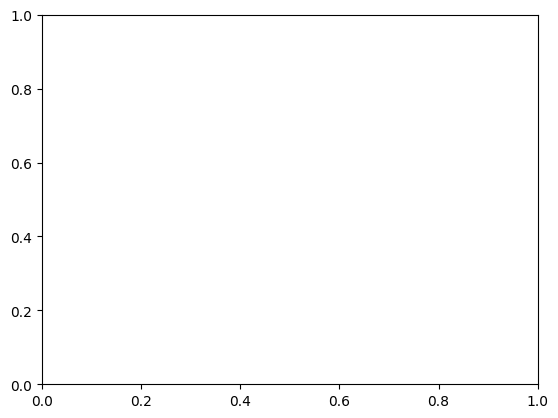

In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

epochs = 15


losses = []
for epoch in range(epochs):
    pass 
    #Train here, looping through the dataset multiple times

#print('Finished Training, test loss is ', test_loss)

plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()
plt.close()